In [1]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
import cPickle as pickle
import numpy as np
import os
from scipy.misc import imread
def load_CIFAR_one(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f)
        X = datadict['data']
        Y = datadict['labels']
        Y = np.array(Y)
        return X, Y
def load_CIFAR10(PATH):
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(PATH, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_one(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    #add your Xval
    del X, Y
    Xte, Yte = load_CIFAR_one(os.path.join(PATH, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [2]:
xtrain,ytrain,xtest,ytest = load_CIFAR10('./data')

In [4]:
xtrain.shape

(50000, 3072)

In [3]:
import keras
x_train = xtrain.reshape((xtrain.shape[0],3,32,32))
x_train = x_train.transpose([0, 2, 3, 1]) #only if 'tf' dim-ordering is to be used
x_test= xtest.reshape((xtest.shape[0],3,32,32))
x_test= x_test.transpose([0, 2, 3, 1])#remove if 'th' dim-ordering is to be used
y_train = keras.utils.to_categorical(ytrain, num_classes=10)
y_test = keras.utils.to_categorical(ytest, num_classes=10)

x_train = x_train/255.0
x_test = x_test/255.0

/home/casapanshop/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [12]:
x_train.shape

(50000, 3, 32, 32)

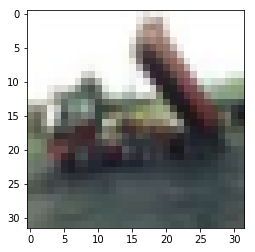

In [18]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
plt.show()

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_10 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
__________

In [ ]:
from keras.optimizers import SGD, rmsprop
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['acc'])

model.fit(x_train, y_train,batch_size=64,nb_epoch=15, validation_data=(x_test, y_test),shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 11s 227us/step - loss: 1.4473 - acc: 0.4839 - val_loss: 1.2517 - val_acc: 0.5600
Epoch 2/15
50000/50000 [==============================] - 11s 213us/step - loss: 1.0032 - acc: 0.6487 - val_loss: 0.8958 - val_acc: 0.6882
Epoch 3/15
50000/50000 [==============================] - 11s 215us/step - loss: 0.8091 - acc: 0.7200 - val_loss: 1.0023 - val_acc: 0.6542
Epoch 4/15
50000/50000 [==============================] - 11s 216us/step - loss: 0.6544 - acc: 0.7736 - val_loss: 0.9104 - val_acc: 0.7021
Epoch 5/15
44672/50000 [=========================>....] - ETA: 1s - loss: 0.5157 - acc: 0.8213

In [30]:
nbin=150
bins = np.linspace(0, 1, nbin+1)

list_histograms = []
for image in x_train:
    imhist, bin_edges = np.histogram(image, bins=bins, density=True)
    imhist = imhist * np.diff(bin_edges)
    list_histograms.append(imhist)
array_histograms = np.asarray(list_histograms)
array_histograms.shape

(50000, 150)

In [10]:
array_histograms

(50000, 32, 32, 3)

In [17]:
ytrain

array([6, 9, 9, ..., 9, 1, 1])

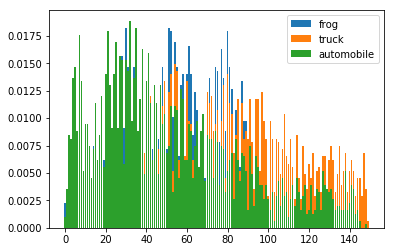

In [31]:
import matplotlib.pyplot as plt
plt.bar(np.arange(150),array_histograms[0],label=label_names[ytrain[0]])
plt.bar(np.arange(150),array_histograms[1],label=label_names[ytrain[1]])
plt.bar(np.arange(150),array_histograms[5],label=label_names[ytrain[5]])

plt.legend()

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(array_histograms)
array_histograms = scaler.transform(array_histograms)

In [35]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation


model = Sequential()
model.add(Dense(1000, input_dim=array_histograms.shape[1],activation='relu'))
#model.add(Dense(250, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy')

model.fit(array_histograms, y_train, epochs=300,verbose=1 )

Epoch 1/300
50000/50000 [==============================] - 15s 304us/step - loss: 2.1458
Epoch 2/300
50000/50000 [==============================] - 14s 286us/step - loss: 2.0765
Epoch 3/300
50000/50000 [==============================] - 12s 246us/step - loss: 2.0498
Epoch 4/300
50000/50000 [==============================] - 12s 248us/step - loss: 2.0282
Epoch 5/300
50000/50000 [==============================] - 12s 246us/step - loss: 2.0099
Epoch 6/300
50000/50000 [==============================] - 12s 244us/step - loss: 1.9944
Epoch 7/300
50000/50000 [==============================] - 12s 245us/step - loss: 1.9792
Epoch 8/300
50000/50000 [==============================] - 12s 245us/step - loss: 1.9619
Epoch 9/300
50000/50000 [==============================] - 13s 251us/step - loss: 1.9471
Epoch 10/300
50000/50000 [==============================] - 14s 279us/step - loss: 1.9267
Epoch 11/300
50000/50000 [==============================] - 12s 242us/step - loss: 1.9073
Epoch 12/300
50000/

KeyboardInterrupt: 

In [22]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 100
epochs = 10
datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=0, # randomly rotate images (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of height)
    horizontal_flip=True, # randomly flip images
    vertical_flip=False) # randomly flip images
datagen.fit(x_train)
model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),steps_per_epoch=x_train.shape[0]// batch_size, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/10
500/500 [==============================] - 57s 113ms/step - loss: 0.9539 - val_loss: 0.9716
Epoch 2/10
500/500 [==============================] - 57s 114ms/step - loss: 0.8238 - val_loss: 0.8427
Epoch 3/10
500/500 [==============================] - 54s 107ms/step - loss: 0.7700 - val_loss: 0.8298
Epoch 4/10
500/500 [==============================] - 52s 104ms/step - loss: 0.7437 - val_loss: 0.9256
Epoch 5/10
500/500 [==============================] - 52s 104ms/step - loss: 0.7293 - val_loss: 0.7694
Epoch 6/10
500/500 [==============================] - 52s 104ms/step - loss: 0.7050 - val_loss: 0.8828
Epoch 7/10
500/500 [==============================] - 53s 107ms/step - loss: 0.6830 - val_loss: 0.7650
Epoch 8/10
500/500 [==============================] - 58s 115ms/step - loss: 0.6745 - val_loss: 0.8091
Epoch 9/10
500/500 [==============================] - 58s 116ms/step - loss: 0.6591 - val_loss: 0.7704
Epoch 10/10
 53/500 [==>...........................] - ETA: 50s - loss: 0

KeyboardInterrupt: 